# Finite Element Method

In [43]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.sparse import linalg

## Problem 1
Use the finite element method to solve

\begin{align}
	\begin{split}
	&{ }\epsilon y'' - y' = -1,\\
	&{ }y(0) = \alpha, \quad y(1) = \beta,
	\end{split} \label{eqn:FEM_exercise}
\end{align}

where $\alpha = 2, \beta = 4$, and $\epsilon = 0.02$.
Use $N = 100$ finite elements ($101$ grid points).
Plot and compare your solution with the analytic solution

$$y(x) = \alpha + x + (\beta - \alpha - 1 ) \frac{e^{x/\epsilon} -1}{e^{1/\epsilon} -1}$$

In [74]:
def make_A(h, eps, N):
    a1 = [0] + [eps/h[i+1] - 1/2 for i in range(N-1)]
    a0 = [1] + [-eps/h[i] - eps/h[i+1] for i in range(N-1)] + [1]
    a_1 = [eps/h[i] + 1/2 for i in range(N-1)] + [0]
    A = sp.diags([a_1, a0, a1], [-1, 0, 1])
    return A

def make_phi(h, alpha, beta, N):
    phi = [alpha] + [-(1/2)*(h[i] + h[i+1]) for i in range(N-1)] + [beta]
    return phi
    
def make_system(grid, alpha, beta, eps, N):
    h = grid[1:] - grid[:-1]
    A = make_A(h, eps, N)
    phi = make_phi(h, alpha, beta, N)
    return A, phi
    

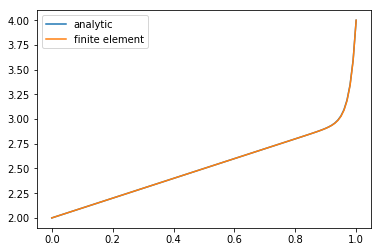

In [59]:
alpha = 2
beta = 4
eps = 0.02
N = 100
grid = np.linspace(0, 1, N+1)
A, phi = make_system(grid, alpha, beta, eps, N)
K = linalg.spsolve(A, phi)

analytic = lambda x: alpha + x + (beta - alpha - 1) * ((np.exp(x/eps)- 1) / (np.exp(1/eps) - 1))
plt.plot(grid, analytic(grid), label="analytic")
plt.plot(grid, K, label="finite element")
plt.legend()
plt.show()

## Problem 2

One of the strengths of the finite element method is the ability to generate grids that better suit the problem.
The solution of this boundary value problem changes most rapidly near $x = 1$.
Compare the numerical solution when the grid points are evenly spaced versus when the grid points are clustered in the area of greatest change. Specifically, use the grid points defined by:

`even_grid = np.linspace(0,1,15)`

`clustered_grid = np.linspace(0,1,15)**(1./8)`

Plot the solution for each grid on the same plot, as well as the analytic solution.

/Users/Seong-EunCho/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


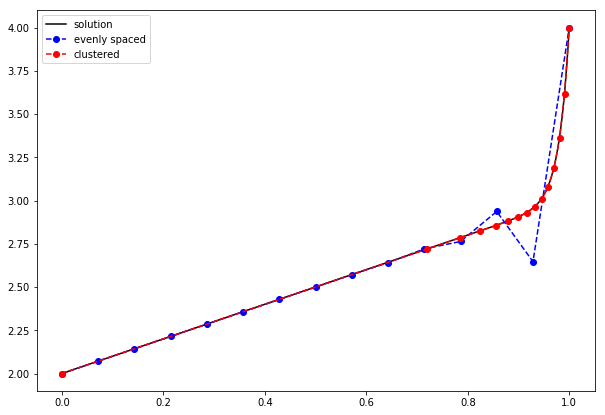

In [84]:
N = 14
even_grid = np.linspace(0, 1, 15)
clustered_grid = np.linspace(0, 1, 15)**(1./8)
A1, phi1 = make_system(even_grid, alpha, beta, eps, N)
A2, phi2 = make_system(clustered_grid, alpha, beta, eps, N)
K1 = linalg.spsolve(A1, phi1)
K2 = linalg.spsolve(A2, phi2)

fig = plt.figure(figsize=(10, 7))
plt.plot(grid, analytic(grid), label="solution", c='k')
plt.plot(even_grid, K1, '--o', label="evenly spaced", c='b')
plt.plot(clustered_grid, K2, '--o', label="clustered", c='r')
plt.legend()
plt.show()

## Problem 3

To examine the error convergence of this finite element method, solve the boundary value problem from Problem 1 on evenly spaced grids with $N = 2^i$ finite elements, $i = 4,5 \dots, 21$. Compute the error for each solution by comparing it to the analytic solution. Use the infinity-norm (the maximum absolute error). Then, make a log-log plot of the error against $h$, the stepsize in the evenly spaced grids. Notice that the error gets worse for very small values of $h$. This is when roundoff error overwhelms the computation.

In [75]:
errors = []
for i in range(4, 22):
    N = 2**i
    grid = np.linspace(0, 1, N+1)
    A, phi = make_system(grid, alpha, beta, eps, N)
    K = linalg.spsolve(A, phi)
    actual = analytic(grid)
    errors.append(np.linalg.norm(K-actual, ord=np.inf))

/Users/Seong-EunCho/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


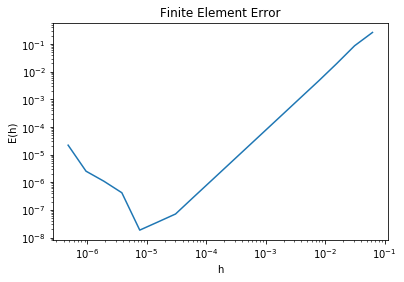

In [79]:
h = [1/(2**i) for i in range(4, 22)]
plt.loglog(h, errors)
plt.ylabel("E(h)")
plt.xlabel("h")
plt.title("Finite Element Error")
plt.show()